#Data Engineering: Automated Feature Selection
Feature selection, or dimensionality reduction, is a collection methods that identify the most informative features of sample sets so that others can be removed. 

Removing irrelevant features is often part of a machine learning preprocessing pipeline. It can improve machine learning models, increasing accuracy, reducing cost, or otherwise boosting performance.

Some feature selection methods are:
* Removing features with low variance
* Univariate feature selection with sample statistics such as top k, percentile, quartile
* Recursive feature elimination
* Feature selection from model
* Sequential feature selection

### Recursive feature elimination (RFE) 
RFE finds the most informative features and returns the model's native scores of each feature and the support (True/False) for inclusion in a machine learning model. RFECV performs RFE in a cross-validation loop wrapped around an ML model -- linear, analogical (SVM), or decision tree. It can work with any model that assigns weights to features.

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html) at Scikit-Learn.

###Problem
Titanic analyses have become part of pop culture. They do illustrate the kind of analysis that often must be done after a disaster. And by now it is widely known that sex, age, family, and social class were associated with survival: women were the more likely to survive, upperclass married women even more so. 

It is less known how to arrive at that knowledge empirically, given a dataset of many features about the passengers on board. 

###Dataset
[Titanic Disaster Dataset](https://data.world/nrippner/titanic-disaster-dataset) on Kaggle.com. 

###Approach
* Use pandas to explore, clean, and prepare the dataset.
* Use Scikit-Learn RFECV to find the most informative and explanatory features. 

###Accomplishments
* A repeatable routine cleans and prepares a rough dataset for use in machine learning. 
* A feature selection algorithm finds emprically  that sex, age, and fare were 5 times more likely to explain survival than any other feature.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#Read files from: /content/drive/MyDrive/datasets/filename.ext

Mounted at /content/drive


##Install Pandas Profiling

In [ ]:
#It's necessary to uninstall, then reinstall, to access some libraries, such as utils.
!pip uninstall pandas-profiling #press y when prompted
!pip install pandas-profiling[notebook,html]

Found existing installation: pandas-profiling 1.4.1
Uninstalling pandas-profiling-1.4.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/pandas_profiling-1.4.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas_profiling/*
Proceed (y/n)? y
  Successfully uninstalled pandas-profiling-1.4.1
     |████████████████████████████████| 261 kB 5.0 MB/s 
     |████████████████████████████████| 596 kB 62.5 MB/s 
     |████████████████████████████████| 102 kB 8.4 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 303 kB 63.8 MB/s 
     |████████████████████████████████| 3.1 MB 40.1 MB/s 
     |████████████████████████████████| 10.9 MB 50.2 MB/s 
     |████████████████████████████████| 675 kB 59.5 MB/s 
     |████████████████████████████████| 130 kB 18.8 MB/s 
     |████████████████████████████████| 812 kB 61.5 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-

##Import Required Libraries

In [ ]:
# Required only to expedite the exploratory data analysis.
import pandas_profiling
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file

In [ ]:
import numpy as np
import pandas as pd

##Read Data

In [ ]:
titanic = pd.read_csv('/content/drive/MyDrive/data/titanic.csv')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


###Data Dictionary
* survival - Survival (0 = No; 1 = Yes)
* class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* name - Name
* sex - Sex
* age - Age
* sibsp - Number of Siblings/Spouses Aboard
* parch - Number of Parents/Children Aboard
* ticket - Ticket Number
* fare - Passenger Fare
* cabin - Cabin
* embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
* boat - Lifeboat (if survived)
* body - Body number (if did not survive and body was recovered)

##Exploratory Data Analysis (EDA)

In [ ]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [ ]:
report = ProfileReport(titanic, title='EDA of Titanic Dataset')
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##Data Preparation Routine


In [ ]:
titanic = pd.read_csv('/content/drive/MyDrive/data/titanic.csv')

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


Most columns with 1309 of 1310 possible values have only one value missing. Other columns must have a plan to imput missing values or to drop the column.

In [ ]:
titanic.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Preparation Plan
All non-numeric columns must be recoded, because RCFCV requires numeric data. Columns with unique values are uninformative and can be removed. 
1.  Drop 'name' and 'ticket' because unique and uniformative.
2.  Map 'sex' categories to digits: male to 0 and female to 1.
3.  Replace missing values in 'age' with the mean.
4. Create new derivative feature, 'cabin_known', because many missing values make pattern learning unlikely, and the information actually preserved is whether cabin is known.
5.  Replace null values in 'embarked' with U for unknown and in 'body' with 0.
6.  Encode the categories in the 'embark' column, then drop the original column.
7.  Drop 'boat' instead of preparing with missing values imputation and categorical encoding. Doing so would curse the model with too many dimensions, and it's unlikely that survival is explained by boat number.
8. Drop the final row of NaNs and remove all remaining nulls.

The plan is subject to experiment and revision.

In [ ]:
#DEVELOP AND TEST OPERATIONS
"""
titanic['sex'] = titanic['sex'].replace({'male':0,'female':1})
titanic['age'] = titanic['age'].fillna(int(titanic['age'].mean()))
titanic['cabin_known'] = [0 if str(x) == 'NaN' else 1 for x in titanic['cabin']]
titanic['embarked'] = titanic['embarked'].fillna('U')
titanic['boat'] = titanic['boat'].fillna('O')
titanic['body'] = titanic['body'].fillna(0)
titanic.head()
"""

"\ntitanic['sex'] = titanic['sex'].replace({'male':0,'female':1})\ntitanic['age'] = titanic['age'].fillna(int(titanic['age'].mean()))\ntitanic['cabin_known'] = [0 if str(x) == 'nan' else 1 for x in titanic['cabin']]\ntitanic['embarked'] = titanic['embarked'].fillna('U')\ntitanic['boat'] = titanic['boat'].fillna('O')\ntitanic['body'] = titanic['body'].fillna(0)\ntitanic.head()\n"

In [ ]:
#TEST 'cabin_known'
# titanic['cabin_known'] = [0 if str(x) == 'nan' else 1 for x in titanic['cabin']]
# titanic['cabin_known'].unique()

array([1, 0])

In [ ]:
# Write a function to encode categorical data with pandas get_dummies.
def encode_features(df_,col):
    dummies = pd.get_dummies(df_[col], drop_first=True, prefix=col)
    #Display dummies created
    print(dummies)
    #Concatenate the dummies and the dataset
    df_ = pd.concat([df_, dummies], axis=1)
    return df_

In [ ]:
# Write a function to prep the data following the plan (documented above).
def data_prep(titanic):
  return (titanic
          .assign(sex = titanic['sex'].replace({'male':0,'female':1}),
                  age = titanic['age'].fillna(int(titanic['age'].mean())),
                  embarked = titanic['embarked'].fillna('U'),
                  body = titanic['body'].fillna(0),
                  cabin_known = [0 if str(x) == 'nan' else 1 for x in titanic['cabin']]
          )
          .pipe(encode_features, 'embarked')
          .drop(['name','ticket','cabin','home.dest','embarked','boat'], axis=1)
          .dropna()
          )

In [ ]:
prepped_data = data_prep(titanic)

      embarked_Q  embarked_S  embarked_U
0              0           1           0
1              0           1           0
2              0           1           0
3              0           1           0
4              0           1           0
...          ...         ...         ...
1305           0           0           0
1306           0           0           0
1307           0           0           0
1308           0           1           0
1309           0           0           1

[1310 rows x 3 columns]


In [ ]:
prepped_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       1308 non-null   float64
 1   survived     1308 non-null   float64
 2   sex          1308 non-null   float64
 3   age          1308 non-null   float64
 4   sibsp        1308 non-null   float64
 5   parch        1308 non-null   float64
 6   fare         1308 non-null   float64
 7   body         1308 non-null   float64
 8   cabin_known  1308 non-null   int64  
 9   embarked_Q   1308 non-null   uint8  
 10  embarked_S   1308 non-null   uint8  
 11  embarked_U   1308 non-null   uint8  
dtypes: float64(8), int64(1), uint8(3)
memory usage: 106.0 KB


In [ ]:
prepped_data.head()

,pclass,survived,sex,age,sibsp,parch,fare,body,cabin_known,embarked_Q,embarked_S,embarked_U
0,1.0,1.0,1.0,29.0000,0.0,0.0,211.3375,0.0,1,0,1,0
1,1.0,1.0,0.0,0.9167,1.0,2.0,151.5500,0.0,1,0,1,0
2,1.0,0.0,1.0,2.0000,1.0,2.0,151.5500,0.0,1,0,1,0
3,1.0,0.0,0.0,30.0000,1.0,2.0,151.5500,135.0,1,0,1,0
4,1.0,0.0,1.0,25.0000,1.0,2.0,151.5500,0.0,1,0,1,0


In [ ]:
prepped_data.tail()

,pclass,survived,sex,age,sibsp,parch,fare,body,cabin_known,embarked_Q,embarked_S,embarked_U
1304,3.0,0.0,1.0,14.5,1.0,0.0,14.4542,328.0,0,0,0,0
1305,3.0,0.0,1.0,29.0,1.0,0.0,14.4542,0.0,0,0,0,0
1306,3.0,0.0,0.0,26.5,0.0,0.0,7.2250,304.0,0,0,0,0
1307,3.0,0.0,0.0,27.0,0.0,0.0,7.2250,0.0,0,0,0,0
1308,3.0,0.0,0.0,29.0,0.0,0.0,7.8750,0.0,0,0,1,0


In [ ]:
prepped_data.cabin_known.unique()

array([1, 0])

#Automatic Feature Selection with RFECV

**Recursive Feature Elimination (RFE)** <br/>
RFE is popular partly because it is easy to configure and use and also it's effective at selecting those features in a training dataset that are more or most relevant in predicting the target variable.

It requires float or integer datatypes and no non-null values, hence the manual data preparation that precedes. 

Pass 4 parameters to the RFECV instance:
1. ***estimator*** — your model instance
2. ***step*** — number of features to remove at each iteration
3. ***cv*** — for Cross-Validation. 
4. ***scoring*** — scoring metric, what you want to optimize for. 

In [ ]:
#Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

###Round 1: Test with 10 cross-validation folds

In [ ]:
#Drop the target column to prevent data leakage.
X = prepped_data.drop('survived', axis=1)
target = prepped_data['survived']

In [ ]:
#Instantiate the Random Forest Classifier estimator
rfc = RandomForestClassifier(random_state=1)
#Apply RFECV passing in the estimator above.
#Step is the nbr of features to remove at each iteration.
#cv is the nbr of cross validation folds.
#No minimum nbr of features specified.
rfecv = RFECV(estimator=rfc, step=1, cv=10, scoring='accuracy')
#Fit the model
rfecv.fit(X, target)

RFECV(cv=10, estimator=RandomForestClassifier(random_state=1),
      scoring='accuracy')

The optimal number of features for a model:

In [ ]:
print('Suggested optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 8


The accuracies obtained with the optimal number of features:

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


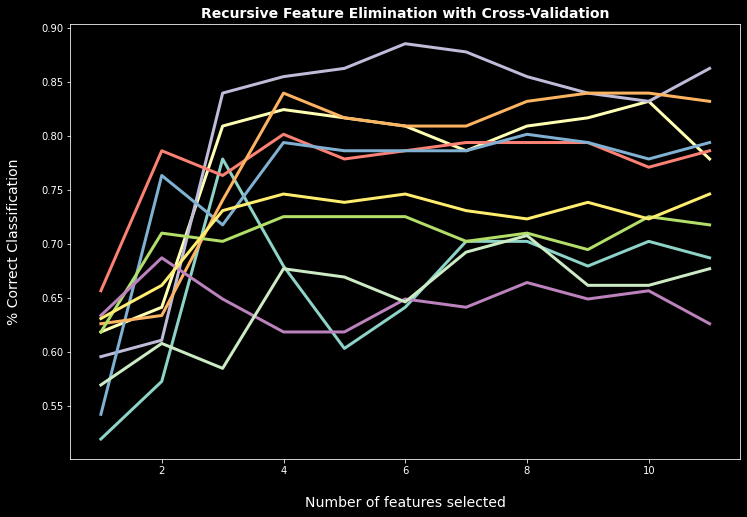

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=14, fontweight='bold')
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, linewidth=3)

plt.show()

After a certain number features, model performance did not improve.

In [ ]:
#Support
results = pd.DataFrame(columns = X.columns)
results.loc[len(results.index)] = rfecv.support_
results

,pclass,sex,age,sibsp,parch,fare,body,cabin_known,embarked_Q,embarked_S,embarked_U
0,True,True,True,True,True,True,True,True,False,False,False


Drop unimportant (unsupported) columns.

In [ ]:
print(np.where(rfecv.support_ == False)[0])
X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[ 8  9 10]


**Feature Importance**

In [ ]:
rfecv.estimator_.feature_importances_

array([0.06127258, 0.2407974 , 0.24162434, 0.04133791, 0.03781008,
       0.2865008 , 0.04739349, 0.04326341])

In [ ]:
important_features = pd.DataFrame(columns = X.columns)
important_features.loc[len(important_features.index)] = rfecv.estimator_.feature_importances_
important_features

,pclass,sex,age,sibsp,parch,fare,body,cabin_known
0,0.061273,0.240797,0.241624,0.041338,0.03781,0.286501,0.047393,0.043263


Most important features are sex, age, fare, and (marginally better than the rest) passenger class (pclass).

In [ ]:
#@title
import numpy as np
dset = pd.DataFrame()
dset['attr'] = X.columns[np.where(rfecv.support_ == True)[0]]
dset['importance'] = rfecv.estimator_.feature_importances_

In [ ]:
X.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'body',
       'cabin_known'],
      dtype='object')

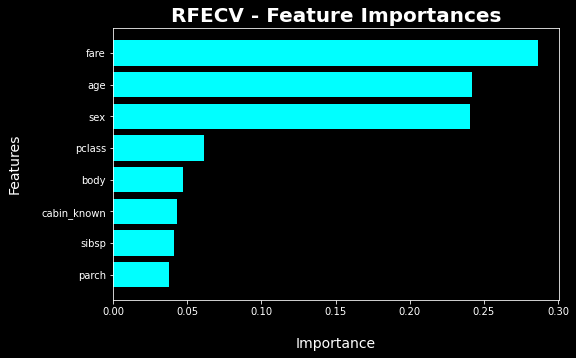

In [ ]:
#Create a dataframe for the plot.
dframe = pd.DataFrame()
dframe['attr'] = X.columns
dframe['importance'] = rfecv.estimator_.feature_importances_
dframe.sort_values(by='importance',ascending=True,inplace=True)

plt.figure(figsize=(8, 5))
plt.barh(y=dframe['attr'], width=dframe['importance'], color='cyan')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold')
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.ylabel('Features', fontsize=14, labelpad=20)
plt.show()

Next Step: Test the model again without encoding embarked. Do stronger differences emerge in the remaining columns?

##Round 2: Testing with 5 cross-validation folds

In [ ]:
#READ DATA
titanic = pd.read_csv('/content/drive/MyDrive/data/titanic.csv')

In [ ]:
#PREP DATA
#Remove fillna and encoding steps for embarked.
def new_data_prep(titanic):
  return (titanic
          .assign(sex = titanic['sex'].replace({'male':0,'female':1}),
                  age = titanic['age'].fillna(int(titanic['age'].mean())),
                  body = titanic['body'].fillna(0),
                  cabin_known = [0 if str(x) == 'nan' else 1 for x in titanic['cabin']]
          )
          .drop(['name','ticket','cabin','home.dest','embarked','boat'], axis=1)
          .dropna()
          )

In [ ]:
r2 = new_data_prep(titanic)
r2.tail()

,pclass,survived,sex,age,sibsp,parch,fare,body,cabin_known
1304,3.0,0.0,1.0,14.5,1.0,0.0,14.4542,328.0,0
1305,3.0,0.0,1.0,29.0,1.0,0.0,14.4542,0.0,0
1306,3.0,0.0,0.0,26.5,0.0,0.0,7.2250,304.0,0
1307,3.0,0.0,0.0,27.0,0.0,0.0,7.2250,0.0,0
1308,3.0,0.0,0.0,29.0,0.0,0.0,7.8750,0.0,0


In [ ]:
#Drop the target column to prevent data leakage.
X2 = r2.drop('survived', axis=1)
y2 = r2['survived']

In [ ]:
#Instantiate and fit model
rfc2 = RandomForestClassifier(random_state=1)
rfecv2 = RFECV(estimator=rfc2, step=1, cv=5, scoring='accuracy')
rfecv2.fit(X2, y2)

RFECV(cv=5, estimator=RandomForestClassifier(random_state=1),
      scoring='accuracy')

In [ ]:
print('Suggested optimal number of features: {}'.format(rfecv2.n_features_))

Suggested optimal number of features: 8


In [ ]:
#What are the most important features?
r2_important_features = pd.DataFrame(columns = X2.columns)
r2_important_features.loc[len(r2_important_features.index)] = rfecv2.estimator_.feature_importances_
r2_important_features

,pclass,sex,age,sibsp,parch,fare,body,cabin_known
0,0.061273,0.240797,0.241624,0.041338,0.03781,0.286501,0.047393,0.043263


In [ ]:
#How do they compare to round 1?
r2_support = pd.DataFrame(columns = X2.columns)
r2_support.loc[len(r2_support.index)] = rfecv2.support_
r2_support

,pclass,sex,age,sibsp,parch,fare,body,cabin_known
0,True,True,True,True,True,True,True,True


Changing the number of cross-validation folds, and dropping the embark column, did not affect the evaluation of other columns. 